Let's laod the needed librabries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import re


Let's load the data as well

In [2]:
test1="data/eval.mgb2/wer.feats"
test2="data/summa_test20170317/wer.feats"

def load_results (one_two):

    one_two=str(one_two)
    #wc     
    glass_file_wc = 'class.out.test'+one_two+'.glass.wc'
    black_file_wc = 'class.out.test'+one_two+'.black.wc'
    ref_file_wc   =  'test'+one_two+'.wc'

    glass_np_wc = np.loadtxt(glass_file_wc,usecols=range(0,1),dtype='float32')+1
    black_np_wc  = np.loadtxt(black_file_wc,usecols=range(0,1),dtype='float32')+1
    ref_np_wc   = np.loadtxt(ref_file_wc,usecols=range(0,1),dtype='float32')

    #err
    glass_file_err  = 'class.out.test'+one_two+'.glass.err'
    black_file_err = 'class.out.test'+one_two+'.black.err'
    ref_file_err   = 'test'+one_two+'.err'

    glass_np_err = np.loadtxt(glass_file_err,usecols=range(0,1),dtype='float32')
    black_np_err = np.loadtxt(black_file_err,usecols=range(0,1),dtype='float32')
    ref_np_err   = np.loadtxt(ref_file_err,usecols=range(0,1),dtype='float32')


    #wer
    glass_np_wer =np.divide(glass_np_err,glass_np_wc)*100
    black_np_wer =np.divide(black_np_err,black_np_wc)*100
    ref_np_wer =np.divide(ref_np_err,ref_np_wc)*100
    
    return glass_np_wc, black_np_wc, ref_np_wc, glass_np_err, black_np_err, ref_np_err, glass_np_wer, black_np_wer, ref_np_wer

id1_np = np.loadtxt(test1,usecols=range(0,1),dtype='str')
id2_np = np.loadtxt(test2,usecols=range(0,1),dtype='str')


Define the plotting function and retrive unique programs from each list

In [3]:
def plot_cm (pred,ref,title="") :
    plt.clf()
    cm = confusion_matrix(pred, ref)
    plt.show()
    # Show confusion matrix in a separate window
    plt.matshow(cm)
    plt.title(title)
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def plot_cm_dsk (pred,ref,_file) :
    plt.clf()
    fig = plt.figure()
    
    
    cm = confusion_matrix(pred, ref)
    
    # Show confusion matrix in a separate window
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(_file, format='pdf')
    
def plot_cm2(pred,ref) :
    plt.clf()
    cm = confusion_matrix(pred, ref)
    
    df_cm = pd.DataFrame(cm)#,range(32),range(21))
    np.random.seed(0)
    import seaborn as sns; sns.set()
    #cm = confusion_matrix(glass_np_wc,ref_np_wc)
    sn.set(font_scale=1.0)#for label size
    sn.heatmap(df_cm, annot=False,annot_kws={"size": 4})# font size
    plt.show()
    
    
plt.show()

def plot_bar_line (ref,glass,black,title="") :
    plt.clf()
       
    x=(np.arange(1,ref.size+1))

    ax = plt.subplot(111)
    ax.bar(x-0.2,ref,width=0.2,color='b',align='center',label='reference')
    ax.bar(x,glass,width=0.2,color='g',align='center',label='glass-box')
    ax.bar(x+0.2,black,width=0.2,color='r',align='center',label='black-box')
    plt.title(title)
    
    legend()

    plt.show()
    plt.clf()
    
    
    
    plt.plot(x, ref,color='b',label='reference')
    plt.plot(x, glass,color='g',label='glass-box')
    plt.plot(x, black,color='r',label='black-box')
    plt.title(title)
    legend()
    
    plt.show()

def plot_bar_dsk (ref,glass,black,_file) :
    plt.clf()
    
    fig = plt.figure()
    
    
       
    x=(np.arange(1,ref.size+1))

    ax = plt.subplot(111)
    ax.bar(x-0.2,ref,width=0.2,color='b',align='center',label='reference')
    ax.bar(x,glass,width=0.2,color='g',align='center',label='glass-box')
    ax.bar(x+0.2,black,width=0.2,color='r',align='center',label='black-box')

    legend()
    plt.savefig(_file, format='pdf')
    
def plot_line_dsk (ref,glass,black,_file) :
    plt.clf()
    
    fig = plt.figure()
    
    
       
    x=(np.arange(1,ref.size+1))

    ax = plt.subplot(111)
    plt.plot(x, ref,color='b',label='reference')
    plt.plot(x, glass,color='g',label='glass-box')
    plt.plot(x, black,color='r',label='black-box')
        

    legend()
    plt.savefig(_file, format='pdf')
    
    

def uniq_programs (id1_np,id2_np) :
    _unique_id1 = {}
    program_counter=0
    for index, content in enumerate (id1_np):
        program= re.sub(r'_seg.*', '', content)
        if program not in _unique_id1.keys(): 
            _unique_id1[program] = {}
            _unique_id1[program]['start'] = index
        else: 
            _unique_id1[program]['end'] = index
            
    _unique_id2 = {}
    for index, content in enumerate (id2_np):
        program= re.sub(r'_\d+\.\d{3}_\d+\.\d{3}', '', content)
        if program not in _unique_id2.keys(): 
            _unique_id2[program] = {}
            _unique_id2[program]['start'] = index
        else: 
            _unique_id2[program]['end'] = index
    
    return _unique_id1, _unique_id2
    

def val_program (program1,count_np):
    _dict_count = {}
    _final_list = []
    for program in program1:
        start_index = program1[program]['start']
        end_index   = program1[program]['end']
        
        sum = np.sum(count_np[start_index:end_index])
        _dict_count [program]=sum
     
    for key in sorted(_dict_count): _final_list.append(_dict_count[key])
    return (np.array(_final_list))


Test1


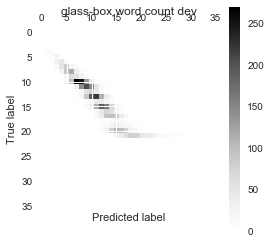

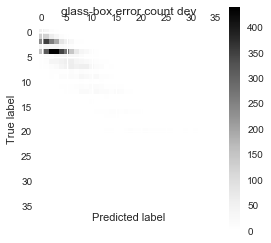

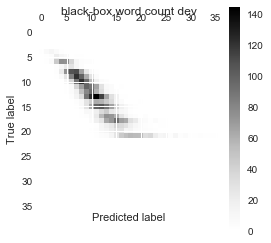

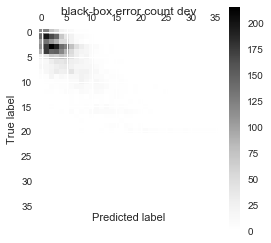

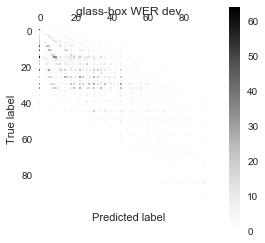

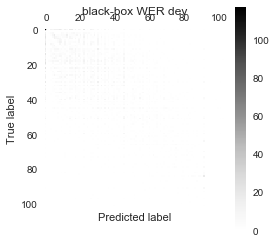

Test2


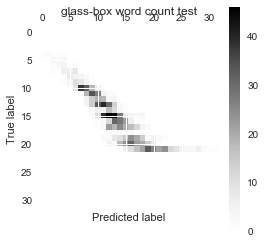

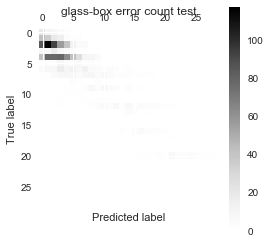

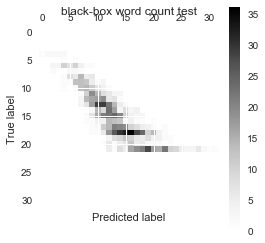

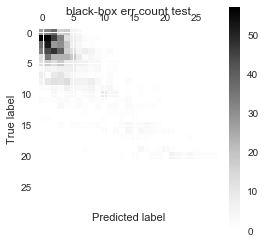

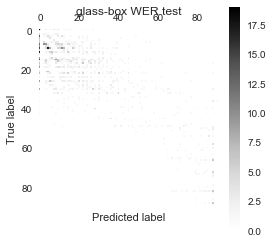

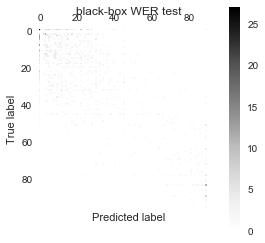

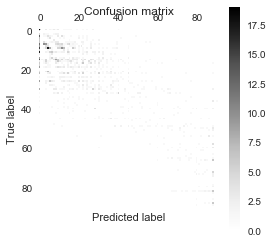

In [4]:
print ("Test1")
glass_np_wc_1, black_np_wc_1, ref_np_wc_1, glass_np_err_1, black_np_err_1, ref_np_err_1, glass_np_wer_1, black_np_wer_1, ref_np_wer_1 = load_results (1)

plot_cm (glass_np_wc_1,ref_np_wc_1,'glass-box word count dev') 
plot_cm (glass_np_err_1,ref_np_err_1,'glass-box error count dev')


plot_cm (black_np_wc_1,ref_np_wc_1,'black-box word count dev')     
plot_cm (black_np_err_1,ref_np_err_1,'black-box error count dev')   


plot_cm (np.around(glass_np_wer_1),np.around(ref_np_wer_1),'glass-box WER dev')
plot_cm (np.around(black_np_wer_1),np.around(ref_np_wer_1),'black-box WER dev')

print ("Test2")
glass_np_wc_2, black_np_wc_2, ref_np_wc_2, glass_np_err_2, black_np_err_2, ref_np_err_2, glass_np_wer_2, black_np_wer_2, ref_np_wer_2 = load_results (2)

plot_cm (glass_np_wc_2,ref_np_wc_2,'glass-box word count test')     
plot_cm (glass_np_err_2,ref_np_err_2,'glass-box error count test')

plot_cm_dsk (glass_np_wc_1,ref_np_wc_1,"wc2_glass_cm.pdf") 
plot_cm_dsk (glass_np_err_1,ref_np_err_1,"err2_glass_cm.pdf") 


plot_cm (black_np_wc_2,ref_np_wc_2,'black-box word count test')     
plot_cm (black_np_err_2,ref_np_err_2,'black-box err count test')     


plot_cm (np.around(glass_np_wer_2),np.around(ref_np_wer_2),'glass-box WER test')
plot_cm (np.around(black_np_wer_2),np.around(ref_np_wer_2),'black-box WER test')

plot_cm_dsk (np.around(glass_np_wer_2),np.around(ref_np_wer_2),"wer2_glass_cm.pdf") 


How about to visualize per program

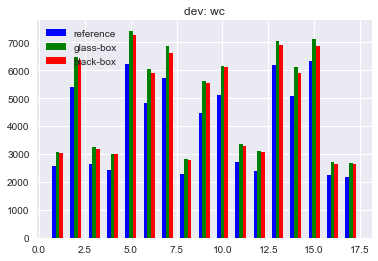

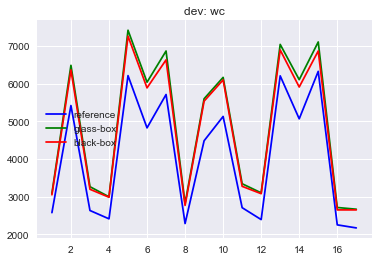

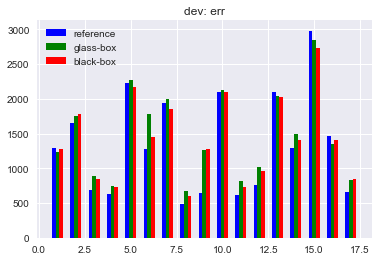

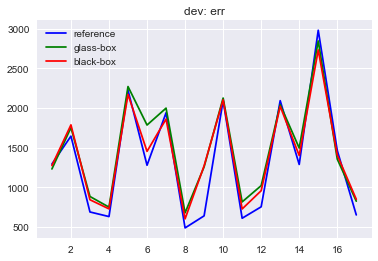

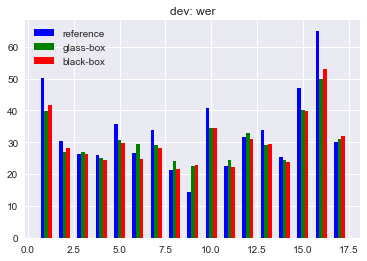

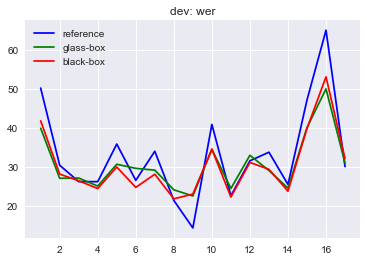

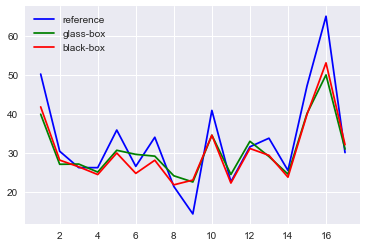

In [5]:
program1, program2 = uniq_programs(id1_np,id2_np)

glass_np_wc_1_program = val_program (program1,glass_np_wc_1)
black_np_wc_1_program = val_program (program1,black_np_wc_1)
ref_np_wc_1_program   = val_program (program1,ref_np_wc_1)

glass_np_err_1_program = val_program (program1,glass_np_err_1)
black_np_err_1_program = val_program (program1,black_np_err_1)
ref_np_err_1_program   = val_program (program1,ref_np_err_1)


glass_np_wer_1_program = np.divide(glass_np_err_1_program,glass_np_wc_1_program)*100
black_np_wer_1_program = np.divide(black_np_err_1_program,black_np_wc_1_program)*100
ref_np_wer_1_program   = np.divide(ref_np_err_1_program,ref_np_wc_1_program)*100

plot_bar_line (ref_np_wc_1_program,glass_np_wc_1_program,black_np_wc_1_program,'dev: wc')
plot_bar_line (ref_np_err_1_program,glass_np_err_1_program,black_np_err_1_program,'dev: err')
plot_bar_line (ref_np_wer_1_program,glass_np_wer_1_program,black_np_wer_1_program,'dev: wer')


plot_bar_dsk (ref_np_wc_1_program,glass_np_wc_1_program,black_np_wc_1_program,'wc1_prog.pdf')
plot_bar_dsk (ref_np_err_1_program,glass_np_err_1_program,black_np_err_1_program,'err1_prog.pdf')
plot_bar_dsk (ref_np_wer_1_program,glass_np_wer_1_program,black_np_wer_1_program,'wer1_prog.pdf')

plot_line_dsk (ref_np_wer_1_program,glass_np_wer_1_program,black_np_wer_1_program,'wer1_prog_line.pdf')


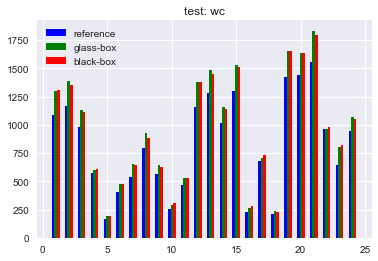

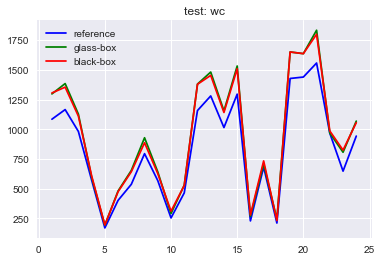

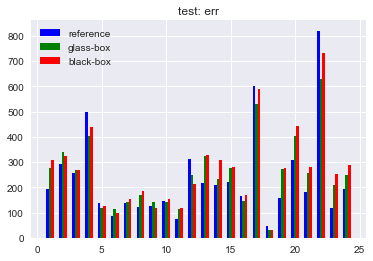

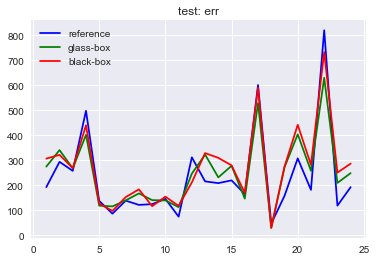

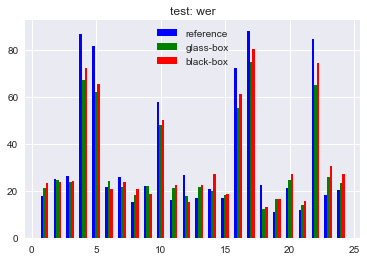

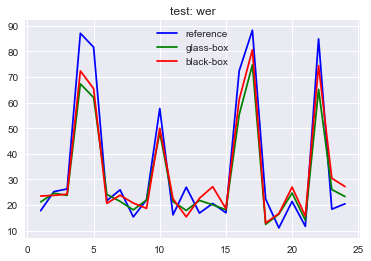

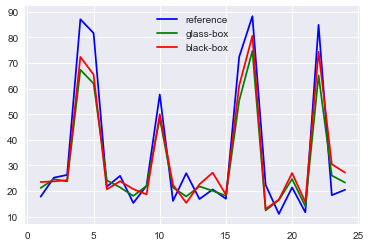

In [6]:
program1, program2 = uniq_programs(id1_np,id2_np)

glass_np_wc_2_program = val_program (program2,glass_np_wc_2)
black_np_wc_2_program = val_program (program2,black_np_wc_2)
ref_np_wc_2_program   = val_program (program2,ref_np_wc_2)

glass_np_err_2_program = val_program (program2,glass_np_err_2)
black_np_err_2_program = val_program (program2,black_np_err_2)
ref_np_err_2_program   = val_program (program2,ref_np_err_2)


glass_np_wer_2_program = np.divide(glass_np_err_2_program,glass_np_wc_2_program)*100
black_np_wer_2_program = np.divide(black_np_err_2_program,black_np_wc_2_program)*100
ref_np_wer_2_program   = np.divide(ref_np_err_2_program,ref_np_wc_2_program)*100

    
plot_bar_line (ref_np_wc_2_program,glass_np_wc_2_program,black_np_wc_2_program,'test: wc')
plot_bar_line (ref_np_err_2_program,glass_np_err_2_program,black_np_err_2_program,'test: err')
plot_bar_line (ref_np_wer_2_program,glass_np_wer_2_program,black_np_wer_2_program,'test: wer')

plot_bar_dsk (ref_np_wc_2_program,glass_np_wc_2_program,black_np_wc_2_program,'wc2_prog.pdf')
plot_bar_dsk (ref_np_err_2_program,glass_np_err_2_program,black_np_err_2_program,'err2_prog.pdf')
plot_bar_dsk (ref_np_wer_2_program,glass_np_wer_2_program,black_np_wer_2_program,'wer2_prog.pdf')

plot_line_dsk (ref_np_wer_2_program,glass_np_wer_2_program,black_np_wer_2_program,'wer2_prog_line.pdf')

Getting duration for:  data/eval.mgb2/wer.feats


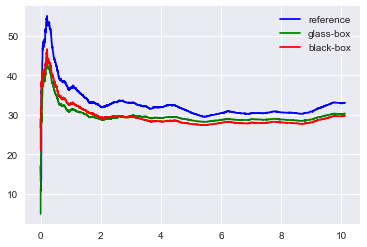

Getting duration for:  data/summa_test20170317/wer.feats


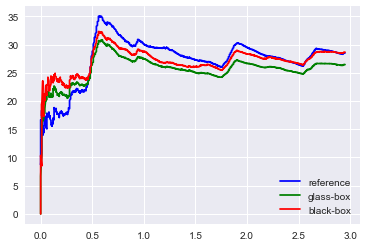

In [7]:
#This part will show the agrregated WER

def get_duration (file):
    print ("Getting duration for: ", file)
    f=open(file,"r")
    lines=f.readlines()
    _dur_acc=[]
    total_duration=0
        
    for _index, _value in enumerate(lines):
        duration =float(str(_value).split('\t')[1].split(' ')[6])
        total_duration+=duration
        _dur_acc.append ("%.2f" % (total_duration/3600))
    
    return _dur_acc
        

def get_acc_wer (glass_np_wc, black_np_wc, ref_np_wc, glass_np_err, black_np_err, ref_np_err):
    
    total_err_ref=0
    total_err_glass=0
    total_err_black=0
    
    total_wc_ref=0
    total_wc_glass=0
    total_wc_black=0
    
    _wer_acc_ref=[]
    _wer_acc_glass=[]
    _wer_acc_black=[]
    
    for _index, _value in enumerate(glass_np_wc):
        
        total_err_ref+=ref_np_err[_index]
        total_err_glass+=glass_np_err[_index]
        total_err_black+=black_np_err[_index]
        
        total_wc_ref+=ref_np_wc[_index]
        total_wc_glass+=glass_np_wc[_index]
        total_wc_black+=black_np_wc[_index]
        
        _wer_acc_ref.append ("%.2f" % (total_err_ref/total_wc_ref*100))
        _wer_acc_glass.append ("%.2f" % (total_err_glass/total_wc_glass*100))
        _wer_acc_black.append ("%.2f" % (total_err_black/total_wc_black*100))
        

    return _wer_acc_ref, _wer_acc_glass, _wer_acc_black



def plot_acc_wer (_dur,wer_acc_ref, wer_acc_glass, wer_acc_black,_file="temp",title=""): 
    plt.clf()
    fig = plt.figure()
    ax = plt.subplot(111)
    plt.plot(_dur,wer_acc_ref,color='b',label='reference')
    plt.plot(_dur,wer_acc_glass,color='g',label='glass-box')
    plt.plot(_dur,wer_acc_black,color='r',label='black-box')
    plt.title(title)
    legend()
    plt.savefig(_file, format='pdf')
    plt.show()

    
wer_acc_ref1, wer_acc_glass1, wer_acc_black1 = get_acc_wer (glass_np_wc_1, black_np_wc_1, ref_np_wc_1, glass_np_err_1, black_np_err_1, ref_np_err_1)
_dur1 = get_duration (test1)
plot_acc_wer (_dur1, wer_acc_ref1, wer_acc_glass1, wer_acc_black1,"dev_aggregated_wer.pdf","")#Dev aggregated WER")

wer_acc_ref2, wer_acc_glass2, wer_acc_black2 = get_acc_wer (glass_np_wc_2, black_np_wc_2, ref_np_wc_2, glass_np_err_2, black_np_err_2, ref_np_err_2)
_dur2 = get_duration (test2)
plot_acc_wer (_dur2, wer_acc_ref2, wer_acc_glass2, wer_acc_black2,"test_aggregated_wer.pdf","")#Test aggregated WER")

    